## **Importing my toolsets**

In [1]:
import processing as pro
import fitting as fit
import visualize as vis
import peaks as pks

# **Specifying location of our file**

In [2]:
file_path = "../Raman/BP_533nm_map.txt"  # Change this to your Raman data file path

# **Reading our datafile. If datafile is a map, specify map = True. col_num specifies which spectrum you would like to plot from input map file.**

In [3]:
raman_shift, intensity, df, yx = pro.read_raman_data(file_path, col_num = 1, map = True, csv = False) 

Reading text file...


,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,301.051,279.0,218.0,247.0,272.0,285.0,269.0,306.0,287.0,391.0,...,237.0,199.0,222.0,207.0,207.0,203.0,239.0,242.0,196.0,247.0
1,302.844,267.0,235.0,239.0,264.0,282.0,269.0,293.0,295.0,389.0,...,241.0,211.0,206.0,187.0,230.0,226.0,251.0,235.0,219.0,255.0
2,304.639,278.0,235.0,245.0,261.0,279.0,269.0,299.0,298.0,387.0,...,235.0,213.0,224.0,190.0,211.0,219.0,235.0,246.0,203.0,255.0
3,306.431,282.0,244.0,230.0,247.0,307.0,243.0,275.0,287.0,406.0,...,235.0,218.0,223.0,203.0,218.0,211.0,239.0,243.0,214.0,257.0
4,308.225,285.0,235.0,239.0,241.0,294.0,266.0,295.0,310.0,367.0,...,231.0,189.0,219.0,190.0,207.0,223.0,243.0,231.0,202.0,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,492.734,378.0,322.0,345.0,326.0,377.0,327.0,359.0,379.0,489.0,...,311.0,269.0,261.0,245.0,269.0,279.0,291.0,329.0,278.0,339.0
109,494.490,358.0,299.0,303.0,323.0,375.0,349.0,351.0,367.0,455.0,...,311.0,279.0,266.0,252.0,273.0,270.0,310.0,307.0,279.0,322.0
110,496.246,379.0,318.0,315.0,330.0,375.0,343.0,379.0,355.0,446.0,...,302.0,267.0,266.0,255.0,287.0,271.0,298.0,307.0,266.0,318.0
111,497.999,355.0,313.0,298.0,338.0,371.0,313.0,366.0,351.0,487.0,...,291.0,266.0,286.0,245.0,279.0,271.0,297.0,314.0,264.0,327.0


In [4]:
display(yx)

,y,x
0,-20.0,-20.0
1,-20.0,-18.0
2,-20.0,-16.0
3,-20.0,-14.0
4,-20.0,-12.0
...,...,...
436,20.0,12.0
437,20.0,14.0
438,20.0,16.0
439,20.0,18.0


# **Normalizing the data**

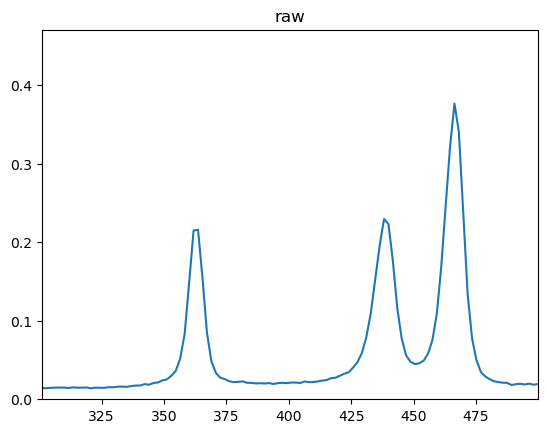

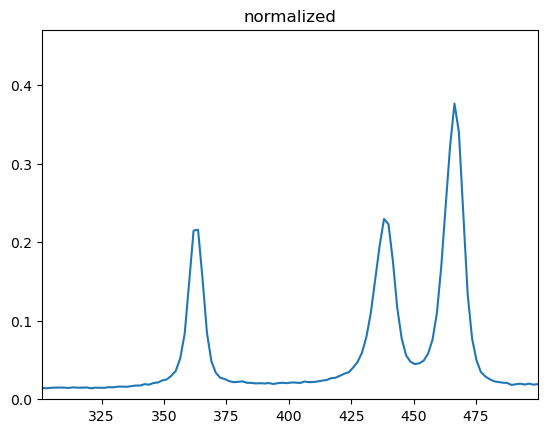

In [7]:
intensity = pro.normalize(raman_shift, intensity)

# **Guess of deg**

In [8]:
deg = 1

# **Removing the baseline, adjusting the degrees may be necessary as oscillation can occur if set too high or low**

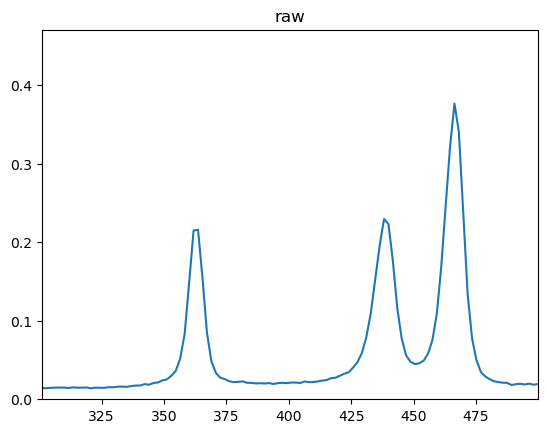

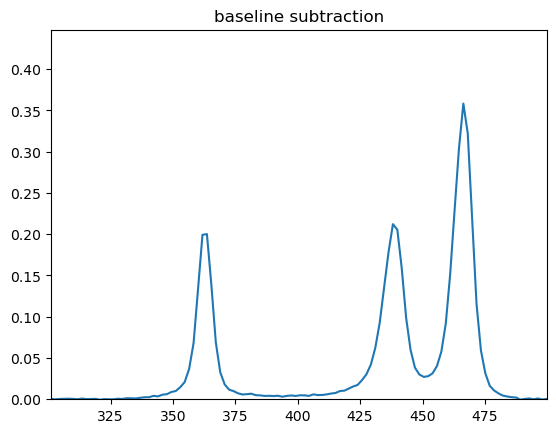

In [9]:
intensity = pro.remove_baseline(raman_shift, intensity, deg)

# **Height and spacing parameters**

In [10]:
height = 0.050
spacing = 15

## **Calculating the peaks from the raw data for use in guessing the fits**

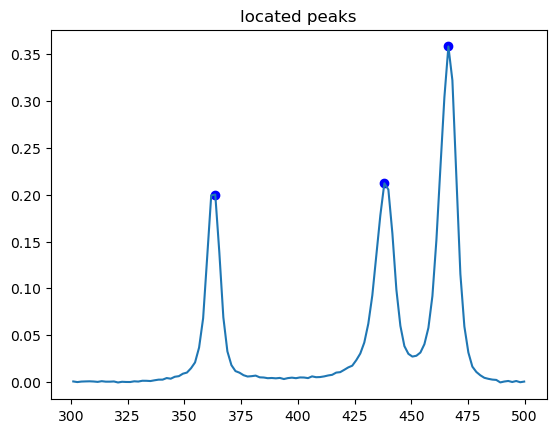

In [11]:
peaks = pks.identify_peaks(raman_shift, intensity, height, spacing)

# **Fitting via lorentzian**

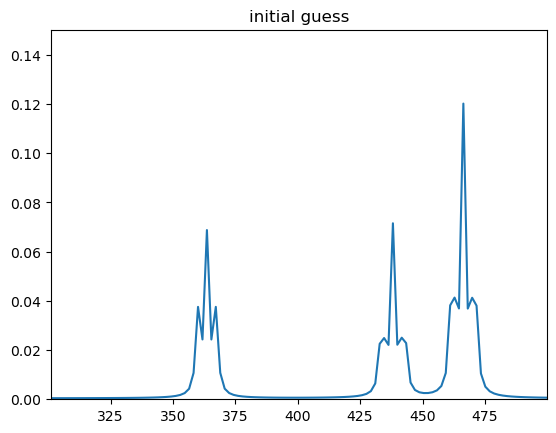

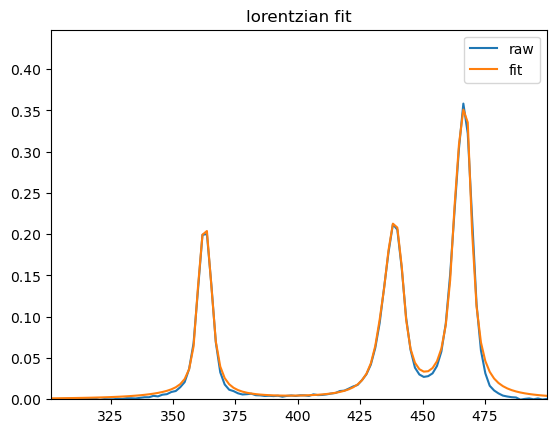

R^2 score: 0.9951944925919223


In [12]:
l_fit_int, l_r2 = fit.raman_lfitter(raman_shift, intensity, peaks)

## **Fitting via gaussian**

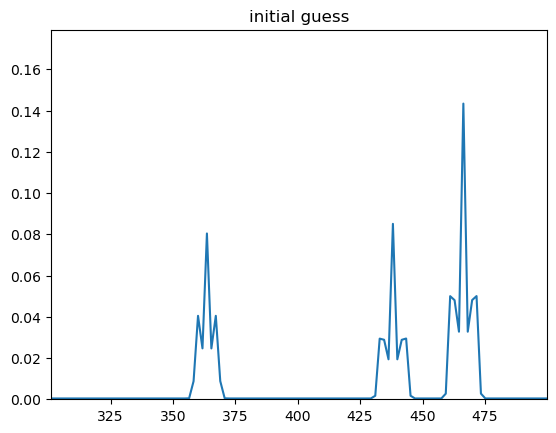

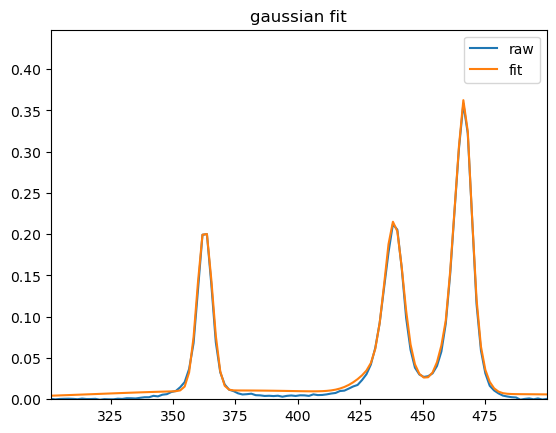

R^2 score: 0.9954206010073579


In [13]:
g_fit_int, g_r2 = fit.raman_gfitter(raman_shift, intensity, peaks)

# **Fitting via voigt**

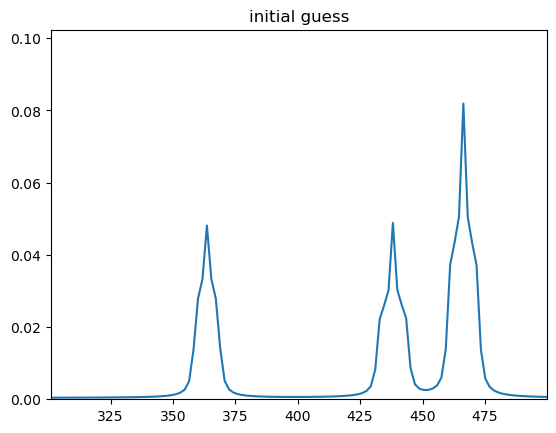

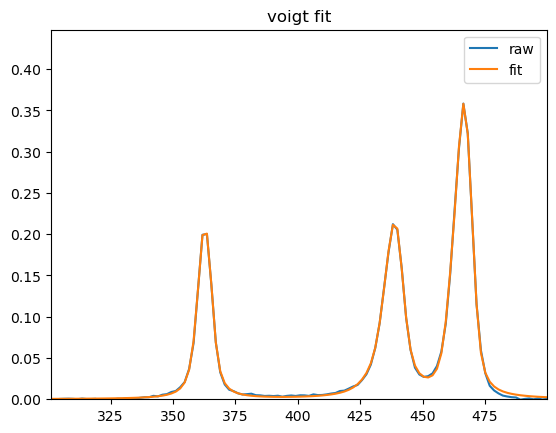

R^2 score: 0.9993838457484443


In [14]:
v_fit_int, v_r2 = fit.raman_vfitter(raman_shift, intensity, peaks)

# **Picking the best fit**

In [15]:
intensity = v_fit_int

# **Calculating the peaks from fitted data**

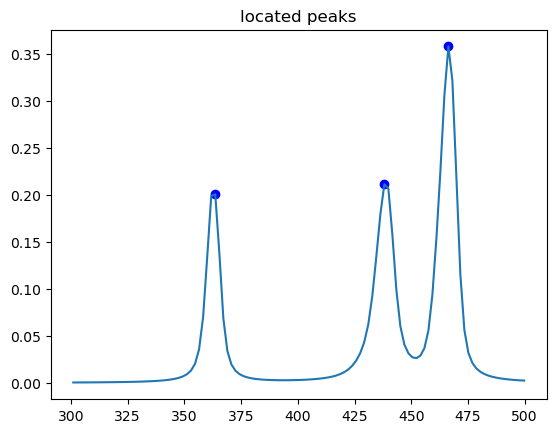

In [16]:
peaks = pks.identify_peaks(raman_shift, intensity, height, spacing)

In [17]:
display(peaks)

{'peak_indices': array([35, 77, 93]),
 'peak_intensity': array([0.20074041, 0.21138085, 0.35806215]),
 'peak_raman_shifts': array([363.625, 438.137, 466.358]),
 'peak_widths': [7.183446592462417, 8.895280103577818, 8.817817376065534],
 'width_heights': array([0.10181316, 0.11890741, 0.18028931]),
 'left_ips': array([359.16674316, 433.94245498, 461.72347987]),
 'right_ips': array([366.35018975, 442.83773508, 470.54129725])}

# **Calculating the area underneath every peak**

In [18]:
peak_integrals = pks.peak_integrals(peaks, raman_shift, intensity)

## **User input cell: Name of material, labels of peaks (left to right), ratio you want to calculate (2 in place of location of numerator peak, 1 for denominator. For example, if labels = ["1st", "2nd", "3rd"], and I want the "3rd"/"2nd" ratio, I would set desired_ratio = [0,1,2])**

In [19]:
material = "graphene"
labels = ['d', 'g', 'c']
desired_ratio = [1,2,0]

# **Calculating the ratios (intensity and areas)**

In [20]:
int_ratio = pks.intensity_ratio(desired_ratio, peaks)
area_ratio = pks.integral_ratio(desired_ratio, peak_integrals)
display(int_ratio)
display(area_ratio)

1.0530059886243839

1.6418364429231191

# **Labelling the ratio**

In [21]:
ratio_label, ratio_df = pks.ratiolabeler(labels, desired_ratio, int_ratio, area_ratio)

# **Calculating all possible peak-to-peak distances**

In [22]:
distances, dist_labels, distance_df = pks.peak_distances(peaks, labels)

# **Visualizing the data**

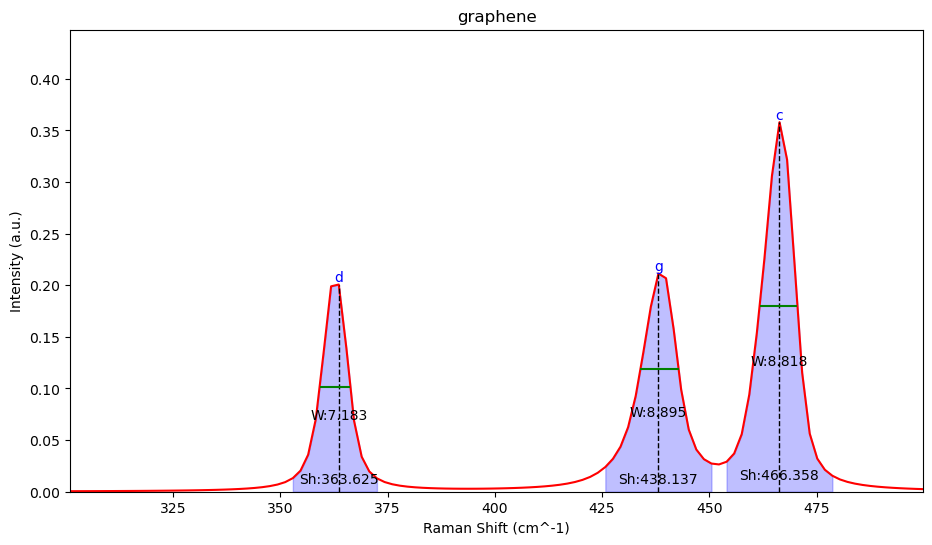

,Intensity,Integral
g/d,1.053006,1.641836


,d-g,d-c,g-c
Peak distances,74.512,102.733,28.221


{'peak_indices': array([35, 77, 93]),
 'peak_intensity': array([0.20074041, 0.21138085, 0.35806215]),
 'peak_raman_shifts': array([363.625, 438.137, 466.358]),
 'peak_widths': [7.183446592462417, 8.895280103577818, 8.817817376065534],
 'width_heights': array([0.10181316, 0.11890741, 0.18028931]),
 'left_ips': array([359.16674316, 433.94245498, 461.72347987]),
 'right_ips': array([366.35018975, 442.83773508, 470.54129725])}

In [23]:
vis.plot_spectrum(raman_shift, intensity, peaks, labels, material)
display(ratio_df)
display(distance_df)
display(peaks)

# **If it's a map, run this cell**

In [ ]:
avg_ratio, heatmap, r2map, spectra = vis.heat_map(df, yx, raman_shift, height, spacing, deg, desired_ratio, 
                                                  ratio_label, voigt = True, lorentzian = False, gaussian = False)

# **Visualizing the heatmaps**

In [ ]:
display(heatmap)
display(r2map)

# **If you're curious about any point on the heatmap, type in your desired x and y coordinates in the last two arguments of this cell**

In [ ]:
vis.lookup_spectrum(raman_shift, spectra, 5, 2.5)

# **Need information regarding any module or function? You can simply type "help(module_name)" for modules and "help(function_name)" for functions.**

In [ ]:
help(pks.identify_peaks)